CNN model - visualize filters and feature maps

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize data and add channel dimension
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
def create_cnn():
    input_layer = Input(shape=(28, 28, 1))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    output_layer = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

model = create_cnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9095 - loss: 0.2932 - val_accuracy: 0.9848 - val_loss: 0.0485
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9862 - loss: 0.0427 - val_accuracy: 0.9918 - val_loss: 0.0354
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9907 - loss: 0.0294 - val_accuracy: 0.9900 - val_loss: 0.0397
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9932 - loss: 0.0206 - val_accuracy: 0.9913 - val_loss: 0.0347
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.9951 - loss: 0.0144 - val_accuracy: 0.9902 - val_loss: 0.0410


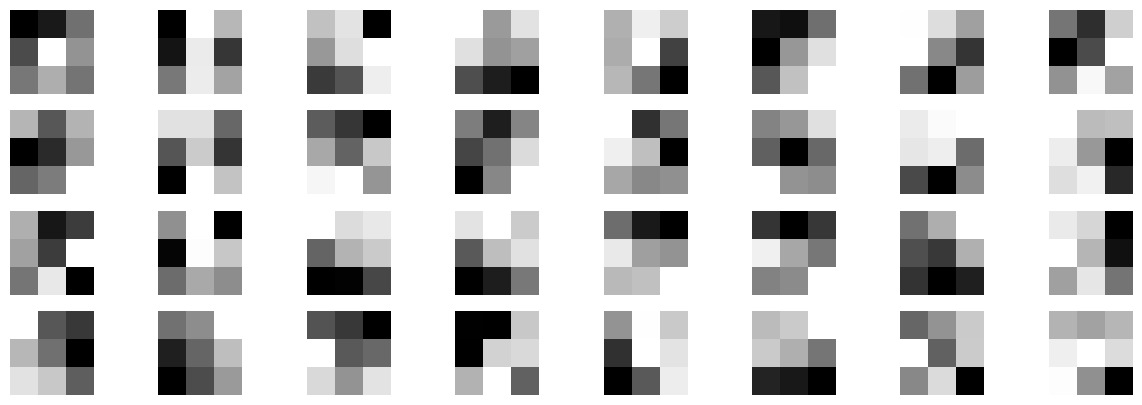

In [5]:
# Extract the first convolutional layer
filters, biases = model.layers[1].get_weights()

# Normalize filter values to [0, 1] for visualization
filters = (filters - filters.min()) / (filters.max() - filters.min())

# Plot the filters
n_filters = filters.shape[-1]
plt.figure(figsize=(15, 5))
for i in range(n_filters):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


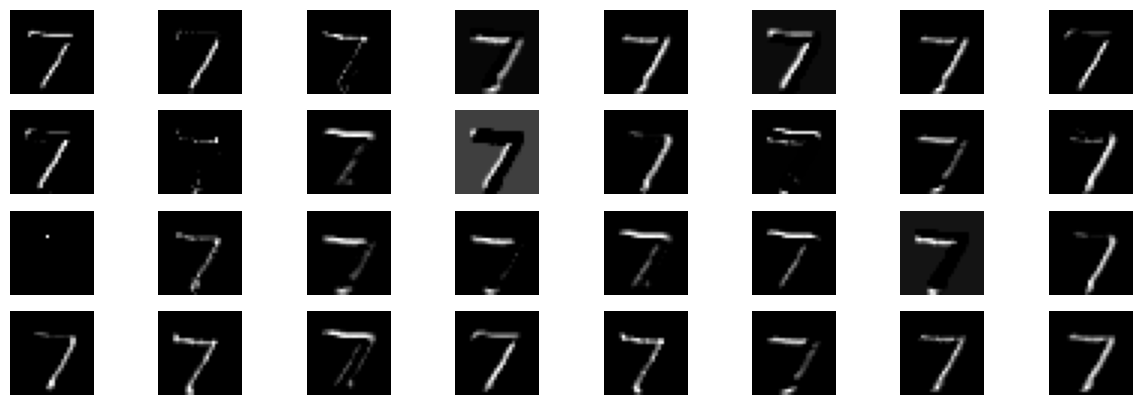

In [6]:
# Create a new model for feature map extraction
feature_model = Model(inputs=model.input, outputs=model.layers[1].output)

# Select an image from the test dataset
test_image = X_test[0][np.newaxis, ...]

# Get the feature maps
feature_maps = feature_model.predict(test_image)

# Visualize feature maps
n_features = feature_maps.shape[-1]
plt.figure(figsize=(15, 5))
for i in range(n_features):
    plt.subplot(4, 8, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()
